## 9-2 Fashion MNIST 

#### 데이터 로드
Fashion MNIST 데이터셋은 케라스에 내장되어 있으며 fashion_mnist를 임포트하고, load_data()를 호출하여 데이터셋을 로드할 수 있습니다.

학습용 데이터셋에서 30% 정도를 검증용 데이터셋으로 만들기 위해서 train_test_split() 함수를 이용해 분리합니다.

최종적으로 딥러닝 모델에 사용할 학습, 검증, 테스트 데이터의 갯수를 출력해서 확인합니다.

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

4431872/4422102 [==============================] - 0s 0us/step
전체 학습 데이터: (60000, 28, 28) 레이블: (60000,)
학습 데이터: (42000, 28, 28) 레이블: (42000,)
검증 데이터: (18000, 28, 28) 레이블: (18000,)
테스트 데이터: (10000, 28, 28) 레이블: (10000,)


In [2]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [3]:
print(y_train[0], class_names[y_train[0]])

6 Shirt


In [4]:
print(x_train[0])

[[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
  107  68   8   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 145 216 197 186 192 135 194 129 123 183 209
  187 184 207 143   4   0   0   0   0   0]
 [  0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183 108 194
  216 173 120 197 201   0   0   0   0   0]
 [  0   0   0   3   0  61 174 177   0  71 158 193 226 121 206 174 178 225
  214 182  10 107 175 132   0   0   0   0]
 [  0   0   0   0   0 164 168 168  70 137  76 239 235 199 127 176 238 121
  216 249 190 147 161 214  27   0   0   0]
 [  0   0   0   0 132 174 166 178  73 168  94 131 202 180 196 254  42   0
  152 174 220 176 144 163 139   0   0   0]
 [  0   0   0   6 200 167 162 180  77 173 189 201 219 120 240 124   1 141
  176 193 223 158 143 153 176  56   0   0]
 [  0   0   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171
  226 167 233 192 127 153 210 127   0   0]
 [  0   0   0   0   0 149 226 177 211 219 217 179 225 163  64   

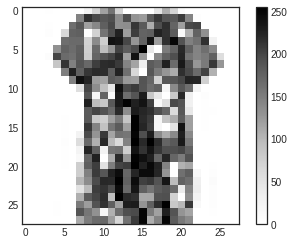

In [5]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

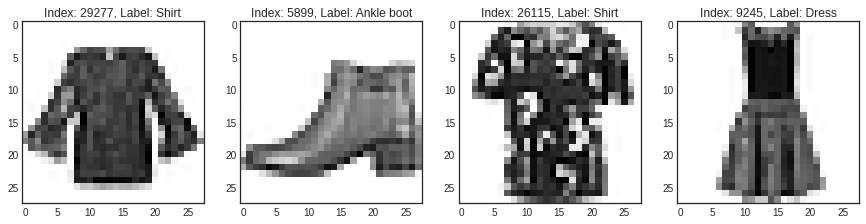

In [6]:
import numpy as np

num_sample = 4
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 10))
for i, idx in enumerate(random_idxs):
    image = x_train_full[idx, :]
    label = y_train_full[idx]
    plt.subplot(1, len(random_idxs), i+1)
    plt.imshow(image)
    plt.title(f'Index: {idx}, Label: {class_names[label]}')

#### 데이터 전처리

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


딥러닝 모델에서 Flatten 레이어를 거쳐도 가능하지만, 미리 데이터셋을 reshape()를 통해 28 * 28 크기인 784로 모양을 바꾸어줍니다. 여기서 reshape()을 할 때, 훈련 데이터는 (42000, 784), 검증 데이터는 (18000, 784), 테스트 데이터는 (10000, 784)로 지정해도 되지만, 28 * 28로만 지정하고 나머지는 -1로 지정하여 자동으로 모양을 맞추도록 하였습니다.

In [8]:
x_train = x_train.reshape(-1, 28 * 28)
x_val = x_val.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(42000, 784)
(18000, 784)
(10000, 784)


In [9]:
# 학습 데이터 중에서 0번째 값을 출력해보면,
# 0부터 255까지의 숫자로 구성되어 있기 때문에 숫자의 범위를 전처리를 통해서 줄여줌.
print(x_train[0])

[  0   0   0   1   0   0   0   0  24  69 118 159  70   0   0   0   0  48
 107  68   8   0   0   0   0   0   0   0   0   0   0   0   0   0   0 145
 216 197 186 192 135 194 129 123 183 209 187 184 207 143   4   0   0   0
   0   0   0   0   0   1   0   0 164 186 119 141 178 198 133 135 211 183
 108 194 216 173 120 197 201   0   0   0   0   0   0   0   0   3   0  61
 174 177   0  71 158 193 226 121 206 174 178 225 214 182  10 107 175 132
   0   0   0   0   0   0   0   0   0 164 168 168  70 137  76 239 235 199
 127 176 238 121 216 249 190 147 161 214  27   0   0   0   0   0   0   0
 132 174 166 178  73 168  94 131 202 180 196 254  42   0 152 174 220 176
 144 163 139   0   0   0   0   0   0   6 200 167 162 180  77 173 189 201
 219 120 240 124   1 141 176 193 223 158 143 153 176  56   0   0   0   0
   0   0  85 213 147 188 170 205 218 220 208 143 116  30 181 171 226 167
 233 192 127 153 210 127   0   0   0   0   0   0   0 149 226 177 211 219
 217 179 225 163  64   0 186 152 128 109 216 197 16

In [10]:
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [11]:
# 학습 데이터 0번째 값을 출력해보면 0 ~ 1 사이의 숫자로 구성되어 있는 것을 알 수 있습니다.
print(x_train[0])

[0.         0.         0.         0.00392157 0.         0.
 0.         0.         0.09411765 0.27058824 0.4627451  0.62352941
 0.2745098  0.         0.         0.         0.         0.18823529
 0.41960784 0.26666667 0.03137255 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.56862745
 0.84705882 0.77254902 0.72941176 0.75294118 0.52941176 0.76078431
 0.50588235 0.48235294 0.71764706 0.81960784 0.73333333 0.72156863
 0.81176471 0.56078431 0.01568627 0.         0.         0.
 0.         0.         0.         0.         0.         0.00392157
 0.         0.         0.64313725 0.72941176 0.46666667 0.55294118
 0.69803922 0.77647059 0.52156863 0.52941176 0.82745098 0.71764706
 0.42352941 0.76078431 0.84705882 0.67843137 0.47058824 0.77254902
 0.78823529 0.         0.         0.         0.         0.
 0.         0.         0.         0.01176471 0.         0.23921569
 0.68235294 0.69411765 0.         0

#### 모델 구성

Fashion MNIST 데이터셋을 패션 종류별로 분류하기 위한 딥러닝 모델을 정의하기 위해 Sequential() 함수를 사용합니다. 첫번째 입력 레이어 Input 으로는 전처리에서 바꾼 모양대로 784개의 형태를 가지도록 하고, 두 번째 레이어는 유닛수 512개와 sigmoid 활성화 함수를 가지는 Dense 레이어를 추가합니다. 그리고 마지막은 분류 갯수인 10으로 유닛수를 지정하고, softmax 활성화 함수를 사용하는 Dense 레이어를 추가합니다.

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 및 학습

모델에 사용할 옵티마이저는 SGD를 사용하고, 손실 함수는 다중 분류에 레이블이 정수로 인코딩 되어 있으므로 sparse_categorical_crossentropy를 지정하며, 지표는 accuracy를 사용합니다.

In [13]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Fashion MNIST 데이터셋을 학습하기 위해 학습용 데이터셋으로 x_train과 y_train을 지정하고, 에폭(epochs)은 60으로 지정하며, 배치 사이즈는 512로 지정하고, 검증을 위해서는 검증 데이터로 분리시킨 x_val와 y_val를 지정하여 fit() 함수를 실행시킵니다.

In [14]:
history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/60
83/83 [==============================] - 2s 7ms/step - loss: 2.1304 - accuracy: 0.4129 - val_loss: 1.9982 - val_accuracy: 0.3725
Epoch 2/60
83/83 [==============================] - 0s 4ms/step - loss: 1.8781 - accuracy: 0.5632 - val_loss: 1.7805 - val_accuracy: 0.5266
Epoch 3/60
83/83 [==============================] - 0s 4ms/step - loss: 1.6862 - accuracy: 0.6232 - val_loss: 1.6059 - val_accuracy: 0.6467
Epoch 4/60
83/83 [==============================] - 0s 4ms/step - loss: 1.5330 - accuracy: 0.6585 - val_loss: 1.4674 - val_accuracy: 0.6649
Epoch 5/60
83/83 [==============================] - 0s 4ms/step - loss: 1.4108 - accuracy: 0.6749 - val_loss: 1.3593 - val_accuracy: 0.6827
Epoch 6/60
83/83 [==============================] - 0s 4ms/step - loss: 1.3123 - accuracy: 0.6910 - val_loss: 1.2719 - val_accuracy: 0.6726
Epoch 7/60
83/83 [==============================] - 0s 4ms/step - loss: 1.2323 - accuracy: 0.7005 - val_loss: 1.2018 - val_accuracy: 0.6825
Epoch 8/60
83/83 [==

83/83 [==============================] - 0s 4ms/step - loss: 0.6134 - accuracy: 0.7890 - val_loss: 0.6257 - val_accuracy: 0.7849
Epoch 60/60
83/83 [==============================] - 0s 4ms/step - loss: 0.6113 - accuracy: 0.7899 - val_loss: 0.6170 - val_accuracy: 0.7893


In [15]:
def show_history(history):
    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize=(12, 5))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, 'b-', label='train_loss')
    ax1.plot(epochs, val_loss, 'r-', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

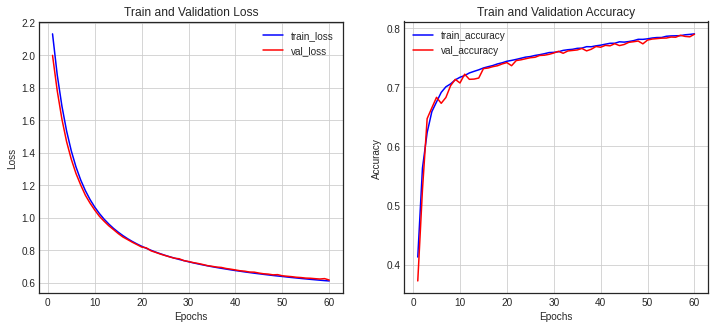

In [16]:
show_history(history)

#### 모델 평가 및 예측

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.6293 - accuracy: 0.7798


[0.629337728023529, 0.7797999978065491]

학습된 모델을 이용해서 예측을 하기 위해서는 predict()를 실행시킵니다. 테스트 데이터 셋인 x_test에 대해 모델의 예측 결과인 pred_ys 중에 5번째를 출력해보면, 분류 10개마다 얼만큼의 비율로 예측했는지 알 수 있습니다.

분류 10개의 각 값들 중에 가장 큰 값이 있는 위치를 반환하도록 argmax()를 수행한 결과를 arg_pred_y에 저장합니다. 그리고 예시로 5번째를 출력해보면 결과로 1이 나오는 것을 알 수 있습니다. 인덱스 1에 해당하는 클래스가 무엇인지 class_names 리스트에서 가져오면 Trouser가 출력되는 것을 알 수 있습니다

In [18]:
pred_ys = model.predict(x_test)
print(pred_ys[5])

arg_pred_y = np.argmax(pred_ys, axis=1)
print(arg_pred_y[5])
print(class_names[arg_pred_y[5]])

[1.5122057e-02 9.4650364e-01 3.7953393e-03 1.0723178e-02 1.7037747e-02
 4.0707524e-05 6.6608279e-03 3.5491274e-05 6.5711167e-05 1.5337144e-05]
1
Trouser


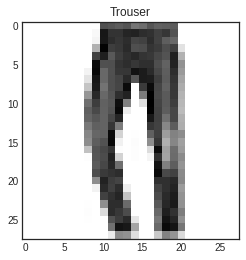

In [19]:
plt.imshow(x_test[5].reshape(-1, 28))
plt.title(class_names[arg_pred_y[5]])
plt.show()

이미지와 레이블을 함께 출력하기 위해서 plot_image() 함수를 정의합니다. 모델이 예측한 값인 pred_ys, 테스트 데이터셋의 정답인 y_test, 그리고 이미지 img에 대해서 i 번째를 가져와서 출력을 수행합니다. 여기서 예측한 결과 레이블인 predicted_label과 정답 레이블인 y_test가 동일하면 색으로 blue를 사용하고, 다르면 red 색을 사용하도록 지정합니다. 이제 예측한 레이블의 이름, 예측한 확률값, 실제 정답 레이블의 이름을 지정한 색으로 출력합니다.

In [20]:
def plot_image(i, pred_ys, y_test, img):
    pred_ys, y_test, img = pred_ys[i], y_test[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(pred_ys)
    if predicted_label == y_test:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(pred_ys),
                                       class_names[y_test]), color=color)

전체 10개 분류 중에서 어떤 클래스에 얼만큼의 확률로 예측을 했는지 출력해주는 plot_class() 함수를 정의합니다. 예측한 결과 레이블인 pred_ys와 정답 레이블인 true_label에서 i 번째의 데이터에 대한 10개 클래스 값들을 바 차트로 시각화합니다. 기본적으로는 색을 darkgray로 지정하고, 예측한 레이블은 red 색상으로 표시하고, 정답 레이블은 blue 색상으로 표시합니다.

In [21]:
def plot_class(i, pred_ys, true_label):
    pred_ys, true_label = pred_ys[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.ylim([0, 1])
    predicted_label = np.argmax(pred_ys)

    plot = plt.bar(range(10), pred_ys, color='darkgray')
    plot[predicted_label].set_color('red')
    plot[true_label].set_color('blue')

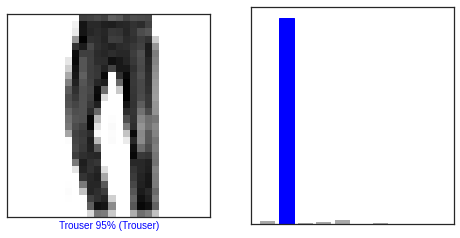

In [22]:
i = 5
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

# Trouser을 95%의 확률로 예측함

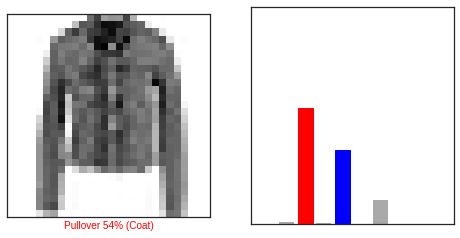

In [23]:
i = 10
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plot_image(i, pred_ys, y_test, x_test.reshape(-1, 28, 28))
plt.subplot(1, 2, 2)
plot_class(i, pred_ys, y_test)
plt.show()

# 10번째 데이터인 Coat를 Pullover로 예측

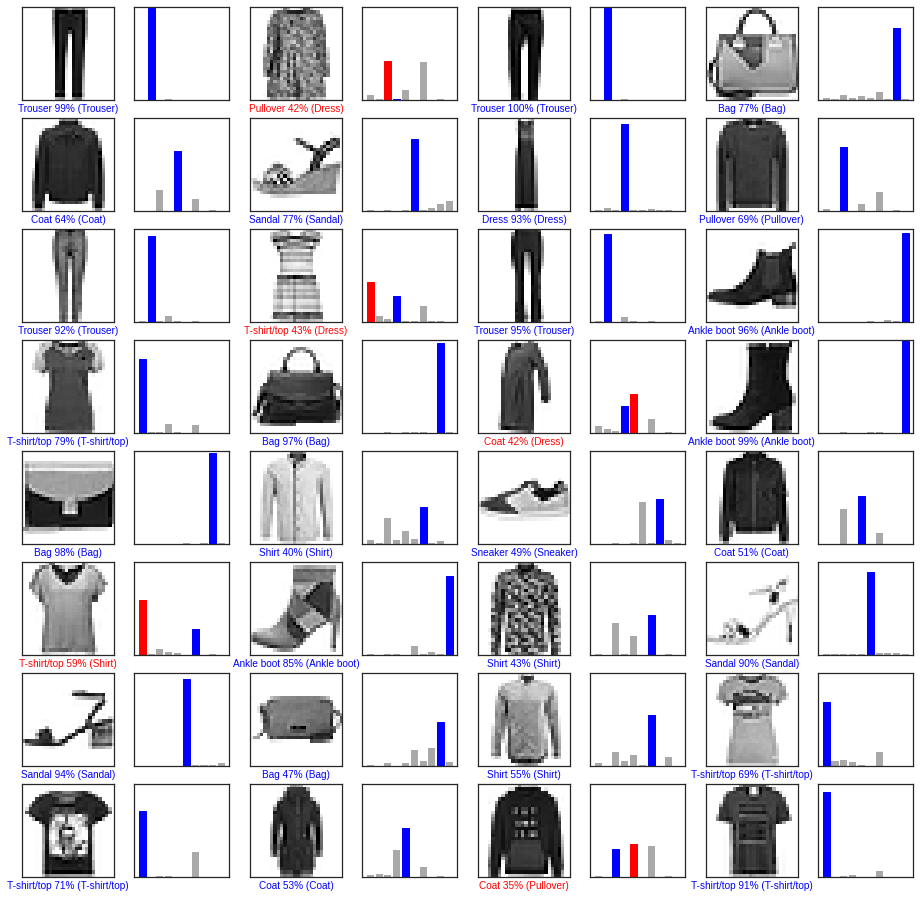

In [24]:
num_rows = 8
num_cols = 4
num_images = num_rows * num_cols

random_num = np.random.randint(10000, size=num_images)
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for idx, num in enumerate(random_num):
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 1)
    plot_image(num, pred_ys, y_test, x_test.reshape(-1, 28, 28))
    plt.subplot(num_rows, 2 * num_cols, 2 * idx + 2)
    plot_class(num, pred_ys, y_test)

plt.show()

classification_report를 이용하여 Fashion MNIST를 분류하는 모델의 결과를 10개 분류 기준 별로 precision, recall, f1-score, support를 살펴볼 수 있습니다.

In [25]:
from tensorflow.keras import utils
from sklearn.metrics import classification_report

y_test_cat = utils.to_categorical(y_test)
print(classification_report(np.argmax(y_test_cat, axis=-1), 
                            np.argmax(pred_ys, axis=-1), 
                            target_names=class_names))

              precision    recall  f1-score   support

 T-shirt/top       0.76      0.77      0.77      1000
     Trouser       0.97      0.92      0.94      1000
    Pullover       0.67      0.65      0.66      1000
       Dress       0.76      0.84      0.80      1000
        Coat       0.66      0.69      0.68      1000
      Sandal       0.85      0.81      0.83      1000
       Shirt       0.49      0.43      0.46      1000
     Sneaker       0.82      0.86      0.84      1000
         Bag       0.91      0.91      0.91      1000
  Ankle boot       0.88      0.92      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



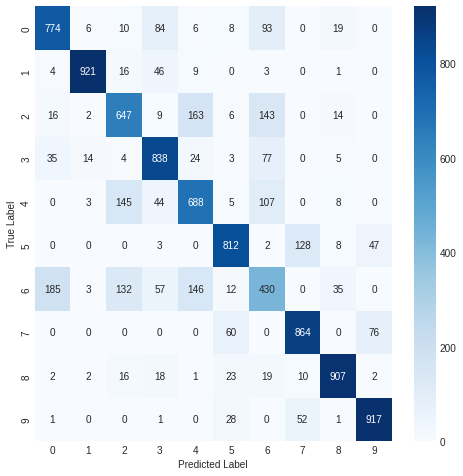

In [26]:
# confusion matrix로 시각화

import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(8, 8))
cm2 = confusion_matrix(np.argmax(y_test_cat, axis=-1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Q. 모델의 성능을 보았을 때 모델이 어떤 클래스를 구분하기 가장 어려워했나요? <br>
A. Shirt를 가장 구분하기 어려워했으며 T-shirt/top(164회), Pullover(116회), Coat(124회)으로 많이 착각했습니다.(일부 내용은 다를 수 있습니다.) <br>

## 9-3 모델 최적화

1. Early Stopping
2. 활성화 함수
3. 옵티마이저
4. 규제
5. 드롭아웃
6. 배치정규화

#### Early Stopping

딥러닝 모델이 학습을 진행하면서 가장 좋은 모델이 fashion_mnist_model.h5 파일로 저장되도록 콜백 함수로 ModelCheckpoint를 사용해 봅시다. 또한 val_loss 값을 10개씩 연속으로 모니터링하며 성능 변화가 없으면 조기 종료되도록 EarlyStopping을 사용합니다.

정의한 콜백 함수를 사용하여 fit() 함수를 실행하여 실제 모델 학습을 진행합시다.

In [27]:
from tensorflow.keras import callbacks

check_point_cb = callbacks.ModelCheckpoint('fashion_mnist_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=60,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5964 - accuracy: 0.7923 - val_loss: 0.5868 - val_accuracy: 0.8006
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5690 - accuracy: 0.8026 - val_loss: 0.5647 - val_accuracy: 0.8084
Epoch 3/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5474 - accuracy: 0.8098 - val_loss: 0.5468 - val_accuracy: 0.8099
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5314 - accuracy: 0.8152 - val_loss: 0.5351 - val_accuracy: 0.8149
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5180 - accuracy: 0.8200 - val_loss: 0.5212 - val_accuracy: 0.8194
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5066 - accuracy: 0.8236 - val_loss: 0.5121 - val_accuracy: 0.8211
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4975 - accuracy: 0.8263 - val_loss: 0.5123 - val_accuracy:

1313/1313 [==============================] - 3s 3ms/step - loss: 0.3772 - accuracy: 0.8661 - val_loss: 0.4135 - val_accuracy: 0.8561
Epoch 58/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3761 - accuracy: 0.8660 - val_loss: 0.4102 - val_accuracy: 0.8577
Epoch 59/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3748 - accuracy: 0.8668 - val_loss: 0.4050 - val_accuracy: 0.8600
Epoch 60/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3737 - accuracy: 0.8670 - val_loss: 0.4064 - val_accuracy: 0.8593


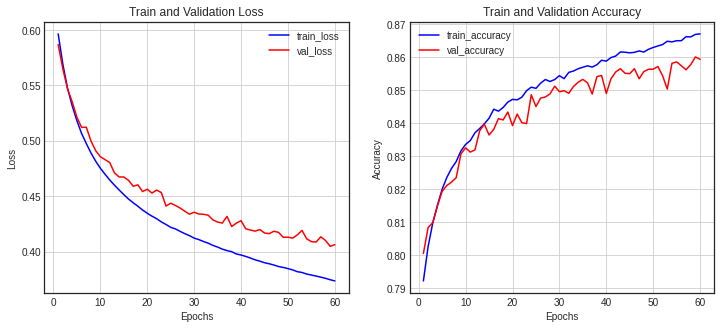

In [28]:
show_history(history)

In [29]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4258 - accuracy: 0.8472


[0.42576611042022705, 0.8471999764442444]

#### 활성화 함수

기존 모델에서는 활성화 함수로 선형 함수인 sigmoid를 사용하였는데, 비선형 함수인 relu로 변경하여 학습이 어떻게 진행되는지 살펴봅니다.
아래 코드 블럭에서 한 번 직접 모델을 작성해보세요!

In [30]:
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [31]:
history2 = model.fit(x_train, y_train, epochs=60,
                    validation_data = (x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7671 - accuracy: 0.7553 - val_loss: 0.5797 - val_accuracy: 0.8078
Epoch 2/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.5288 - accuracy: 0.8231 - val_loss: 0.5133 - val_accuracy: 0.8255
Epoch 3/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4795 - accuracy: 0.8361 - val_loss: 0.5125 - val_accuracy: 0.8173
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4538 - accuracy: 0.8425 - val_loss: 0.4529 - val_accuracy: 0.8470
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4338 - accuracy: 0.8490 - val_loss: 0.4462 - val_accuracy: 0.8506
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4188 - accuracy: 0.8550 - val_loss: 0.4450 - val_accuracy: 0.8482
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4066 - accuracy: 0.8586 - val_loss: 0.4279 - val_accuracy:

1313/1313 [==============================] - 3s 3ms/step - loss: 0.2193 - accuracy: 0.9233 - val_loss: 0.3304 - val_accuracy: 0.8846
Epoch 58/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2174 - accuracy: 0.9247 - val_loss: 0.3166 - val_accuracy: 0.8911
Epoch 59/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2160 - accuracy: 0.9254 - val_loss: 0.3230 - val_accuracy: 0.8882
Epoch 60/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2132 - accuracy: 0.9269 - val_loss: 0.3203 - val_accuracy: 0.8874


In [32]:
def diff_history(history1, history2):
    history1_dict = history1.history
    h1_loss = history1_dict['loss']
    h1_val_loss = history1_dict['val_loss']

    history2_dict = history2.history
    h2_loss = history2_dict['loss']
    h2_val_loss = history2_dict['val_loss']

    epochs1 = range(1, len(h1_loss) + 1)
    epochs2 = range(1, len(h2_loss) + 1)

    fig = plt.figure(figsize=(12, 5))
    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs1, h1_loss, 'b-', label='train_loss')
    ax1.plot(epochs1, h1_val_loss, 'r-', label='val_loss')
    ax1.plot(epochs2, h2_loss, 'b--', label='train_loss')
    ax1.plot(epochs2, h2_val_loss, 'r--', label='val_loss')
    ax1.set_title('Train and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.grid()
    ax1.legend()

    h1_accuracy = history1_dict['accuracy']
    h1_val_accuracy = history1_dict['val_accuracy']

    h2_accuracy = history2_dict['accuracy']
    h2_val_accuracy = history2_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs1, h1_accuracy, 'b-', label='train_accuracy')
    ax2.plot(epochs1, h1_val_accuracy, 'r-', label='val_accuracy')
    ax2.plot(epochs2, h2_accuracy, 'b--', label='train_accuracy')
    ax2.plot(epochs2, h2_val_accuracy, 'r--', label='val_accuracy')
    ax2.set_title('Train and Validation Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

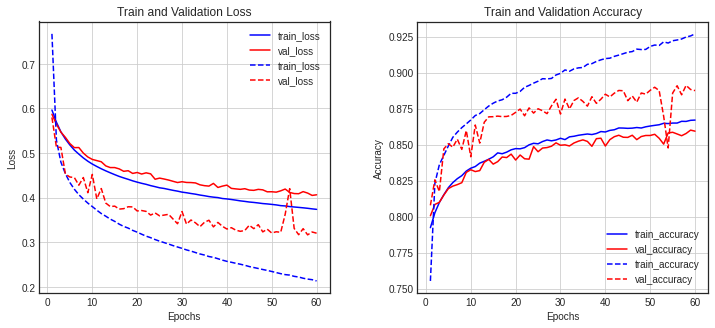

In [33]:
diff_history(history, history2)

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3422 - accuracy: 0.8775


[0.3421962559223175, 0.8774999976158142]

#### 옵티마이저

In [35]:
# 직접 코드를 입력해보세요
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [36]:
history3 = model.fit(x_train, y_train, epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3830 - accuracy: 0.8652 - val_loss: 0.4084 - val_accuracy: 0.8624
Epoch 2/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3323 - accuracy: 0.8795 - val_loss: 0.4094 - val_accuracy: 0.8601
Epoch 3/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3100 - accuracy: 0.8877 - val_loss: 0.3536 - val_accuracy: 0.8747
Epoch 4/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2891 - accuracy: 0.8932 - val_loss: 0.3451 - val_accuracy: 0.8796
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2731 - accuracy: 0.8990 - val_loss: 0.3403 - val_accuracy: 0.8843
Epoch 6/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2615 - accuracy: 0.9034 - val_loss: 0.3249 - val_accuracy: 0.8905
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.2492 - accuracy: 0.9069 - val_loss: 0.3510 - val_accuracy:

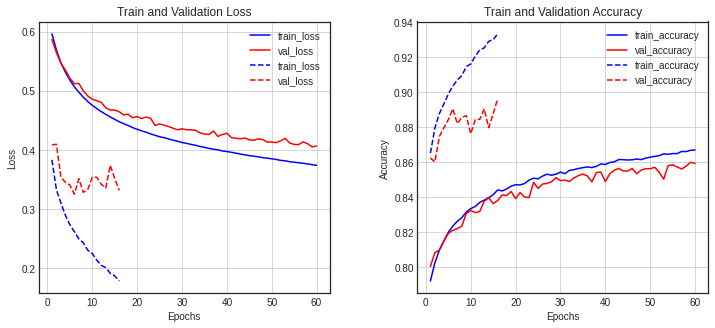

In [37]:
diff_history(history, history3)

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3473 - accuracy: 0.8793


[0.34731507301330566, 0.8792999982833862]

#### 규제

In [39]:
# 직접 코드를 입력해보세요
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax', kernel_regularizer='l2'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [40]:
history4 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.6992 - accuracy: 0.8038 - val_loss: 0.5791 - val_accuracy: 0.8337
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5379 - accuracy: 0.8413 - val_loss: 0.5179 - val_accuracy: 0.8477
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4945 - accuracy: 0.8535 - val_loss: 0.4944 - val_accuracy: 0.8541
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4687 - accuracy: 0.8626 - val_loss: 0.4692 - val_accuracy: 0.8614
Epoch 5/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4526 - accuracy: 0.8666 - val_loss: 0.4800 - val_accuracy: 0.8601
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4397 - accuracy: 0.8710 - val_loss: 0.4824 - val_accuracy: 0.8578
Epoch 7/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.4300 - accuracy: 0.8743 - val_loss: 0.4605 - val_accuracy:

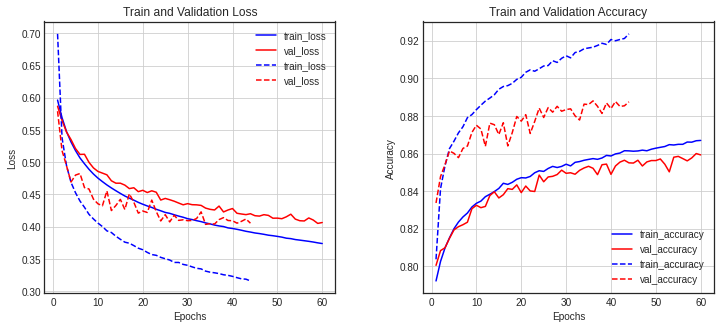

In [41]:
diff_history(history, history4)

In [42]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4257 - accuracy: 0.8785


[0.42573320865631104, 0.8784999847412109]

#### 드롭아웃

In [43]:
# 직접 코드를 입력해보세요

model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax', kernel_regularizer='l2'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [44]:
history5 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.7742 - accuracy: 0.7756 - val_loss: 0.5943 - val_accuracy: 0.8286
Epoch 2/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5855 - accuracy: 0.8263 - val_loss: 0.5365 - val_accuracy: 0.8432
Epoch 3/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5417 - accuracy: 0.8385 - val_loss: 0.5217 - val_accuracy: 0.8438
Epoch 4/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.5144 - accuracy: 0.8479 - val_loss: 0.4973 - val_accuracy: 0.8514
Epoch 5/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4972 - accuracy: 0.8536 - val_loss: 0.4797 - val_accuracy: 0.8609
Epoch 6/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4837 - accuracy: 0.8580 - val_loss: 0.4765 - val_accuracy: 0.8601
Epoch 7/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.4752 - accuracy: 0.8606 - val_loss: 0.4769 - val_accuracy:

1313/1313 [==============================] - 4s 3ms/step - loss: 0.3537 - accuracy: 0.9061 - val_loss: 0.4076 - val_accuracy: 0.8858
Epoch 58/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3516 - accuracy: 0.9067 - val_loss: 0.4044 - val_accuracy: 0.8859
Epoch 59/60
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3518 - accuracy: 0.9065 - val_loss: 0.4111 - val_accuracy: 0.8844
Epoch 60/60
1313/1313 [==============================] - 3s 3ms/step - loss: 0.3500 - accuracy: 0.9070 - val_loss: 0.4058 - val_accuracy: 0.8853


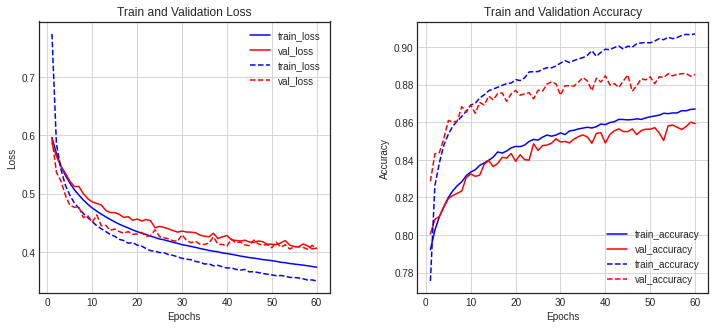

In [45]:
# 기존모델 학습 결과와 드롭아웃을 적용한 방법의 학습결과를 살펴보면
# 과대적합을 잘 방지하고 있는 결과를 보여줌

diff_history(history, history5)

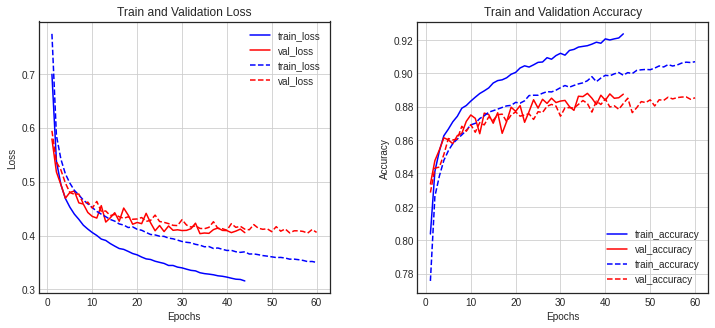

In [46]:
# 규제 방법중에 L2규제보다는 드롭아웃 방법이 더 좋은 결과를 보여주는 것을 알 수 있따. 

diff_history(history4, history5)

In [47]:
# 드롭아웃 방법을 적용한 모델의 평가 결과를 확인한다

model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4267 - accuracy: 0.8775


[0.42666199803352356, 0.8774999976158142]

#### 배치 정규화

빠르고 효과적인 학습을 도와주는 배치 정규화도 적용해보기 위해 Dense 레이어 다음에 BatchNormalization 레이어를 추가하고, 이후 활성화 함수 Activation 레이어를 추가합니다.

In [48]:
# 직접 코드를 입력해보세요
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='sigmoid'))
# model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax', kernel_regularizer='l2'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 412,234
Trainable params: 409,642
Non-trainable params: 2,592
_________________________________________________________________


In [49]:
history6 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.6212 - accuracy: 0.8157 - val_loss: 0.4569 - val_accuracy: 0.8556
Epoch 2/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4507 - accuracy: 0.8519 - val_loss: 0.4369 - val_accuracy: 0.8556
Epoch 3/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4107 - accuracy: 0.8638 - val_loss: 0.4172 - val_accuracy: 0.8623
Epoch 4/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3828 - accuracy: 0.8748 - val_loss: 0.3970 - val_accuracy: 0.8738
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3653 - accuracy: 0.8809 - val_loss: 0.3801 - val_accuracy: 0.8781
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3507 - accuracy: 0.8863 - val_loss: 0.3729 - val_accuracy: 0.8801
Epoch 7/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.3380 - accuracy: 0.8920 - val_loss: 0.3725 - val_accuracy:

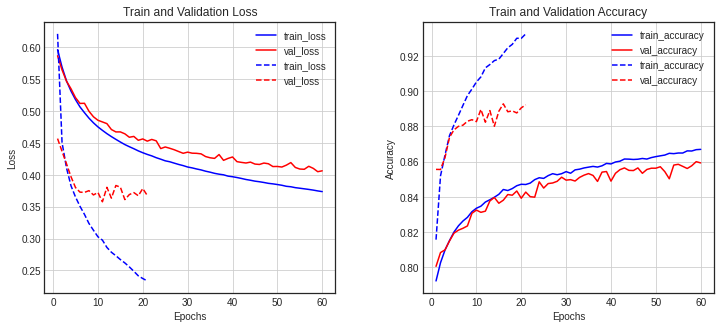

In [50]:
diff_history(history, history6)

In [51]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3844 - accuracy: 0.8806


[0.38436636328697205, 0.8805999755859375]

#### 배치정규화+드롭아웃

배치 정규화를 통해 안정적인 학습이 가능하지만, 규제 방법 중 좋은 성능을 보였던 드롭아웃을 함께 적용해보도록 하겠습니다. 기존 배치 정규화를 적용한 모델에 Activation 레이어 이후에 Dropout 레이어를 추가해주면 됩니다.

In [52]:
# 직접 코드를 입력해보세요
model = models.Sequential()
model.add(layers.Input(shape=(784, )))
model.add(layers.BatchNormalization())
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation='softmax', kernel_regularizer='l2'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_10 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                5130      
Total params: 412,234
Trainable params: 409,642
Non-trainable params: 2,592
_________________________________________________________________


In [53]:
history7 = model.fit(x_train, y_train, 
                     epochs=60,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
1313/1313 [==============================] - 6s 4ms/step - loss: 0.6965 - accuracy: 0.7921 - val_loss: 0.5094 - val_accuracy: 0.8392
Epoch 2/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.5295 - accuracy: 0.8322 - val_loss: 0.4631 - val_accuracy: 0.8546
Epoch 3/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4928 - accuracy: 0.8438 - val_loss: 0.4407 - val_accuracy: 0.8602
Epoch 4/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4756 - accuracy: 0.8488 - val_loss: 0.4241 - val_accuracy: 0.8661
Epoch 5/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4599 - accuracy: 0.8523 - val_loss: 0.4102 - val_accuracy: 0.8727
Epoch 6/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4451 - accuracy: 0.8591 - val_loss: 0.4015 - val_accuracy: 0.8739
Epoch 7/60
1313/1313 [==============================] - 5s 4ms/step - loss: 0.4369 - accuracy: 0.8615 - val_loss: 0.4079 - val_accuracy:

1313/1313 [==============================] - 5s 4ms/step - loss: 0.3246 - accuracy: 0.8983 - val_loss: 0.3601 - val_accuracy: 0.8933


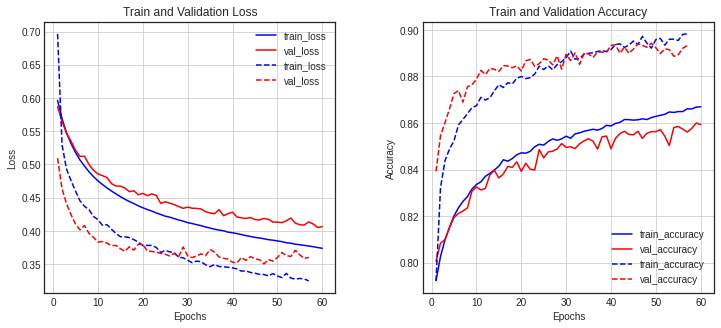

In [54]:
diff_history(history, history7)

In [55]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3797 - accuracy: 0.8849


[0.3797234296798706, 0.8848999738693237]

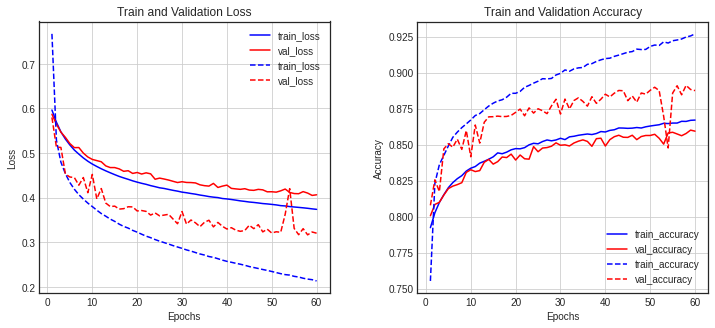

In [59]:
diff_history(history, history2)

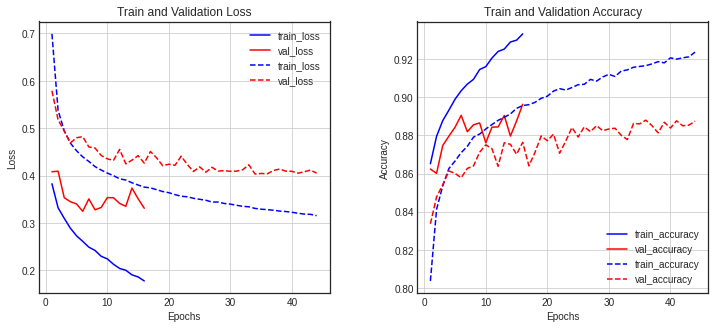

In [60]:
diff_history(history3, history4)

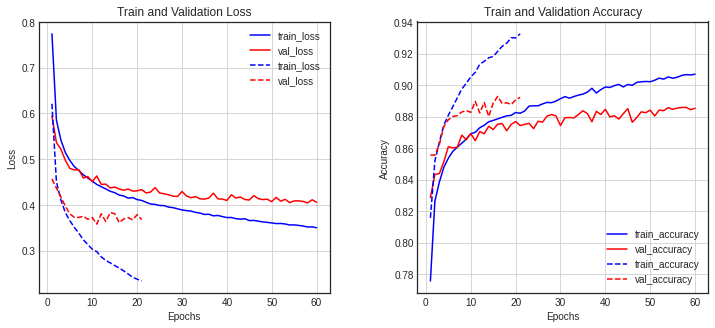

In [61]:
diff_history(history5, history6)

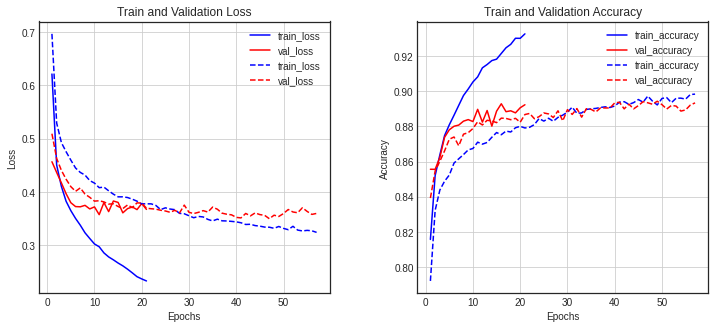

In [62]:
diff_history(history6, history7)
# 한꺼번에 하면 안됨, 2개씩 하셈